In [107]:
# 1. Importing the required libraries for EDA
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multinomial

### EDA

In [108]:
# 2. Loading the data into the DataFrame
df = pd.read_csv("../data/data_for_EDA.csv", index_col=0)
# Drop null values 
df.dropna(axis=0, how='any', inplace=True)
# Display the top 5 rows 
print(df.head())
print(df.describe())  # Summary statistics

                    name  price  rating  distance   latitude  longitude  \
0  Coffee & Whisky House    3.0     8.8       657  53.011939  18.611414   
1  Coffee & Whisky House    3.0     8.8       603  53.012029  18.596202   
2  Coffee & Whisky House    3.0     8.8       229  53.009622  18.600228   
3  Coffee & Whisky House    3.0     8.8       211  53.007485  18.600735   
4  Coffee & Whisky House    3.0     8.8       832  53.015745  18.607203   

   bikes_available  
0                5  
1                6  
2                4  
3                6  
4                9  
            price      rating     distance    latitude   longitude  \
count  254.000000  254.000000   254.000000  254.000000  254.000000   
mean     1.677165    5.574016   627.649606   53.017555   18.604030   
std      0.758425    1.899894   302.716814    0.008308    0.020508   
min      1.000000    1.000000    20.000000   53.000452   18.561600   
25%      1.000000    4.000000   405.750000   53.012029   18.596202   
50%

In [109]:
# 3. Checking the types of data
df.dtypes

name                object
price              float64
rating             float64
distance             int64
latitude           float64
longitude          float64
bikes_available      int64
dtype: object

In [110]:
df.describe()

,price,rating,distance,latitude,longitude,bikes_available
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,1.677165,5.574016,627.649606,53.017555,18.604030,6.212598
std,0.758425,1.899894,302.716814,0.008308,0.020508,1.514775
min,1.000000,1.000000,20.000000,53.000452,18.561600,3.000000
25%,1.000000,4.000000,405.750000,53.012029,18.596202,5.000000
50%,2.000000,4.900000,622.500000,53.015745,18.601638,6.000000
75%,2.000000,7.300000,841.000000,53.021252,18.612899,7.000000
max,4.000000,8.800000,1404.000000,53.049682,18.692462,9.000000


In [111]:
# 4. Dropping irrelevant columns
df = df.drop(columns=['name', 'latitude', 'longitude'], axis=1)
df.head()

,price,rating,distance,bikes_available
0,3.0,8.8,657,5
1,3.0,8.8,603,6
2,3.0,8.8,229,4
3,3.0,8.8,211,6
4,3.0,8.8,832,9


In [112]:
# 5. Renaming the columns
# df = df.rename(columns={"Column_Name": "New_Name"})
# df.head()

In [113]:
# 6. Dropping the duplicate rows
print(f'DataFrame before dropping duplicates {df.shape}')
duplicates_df = df[df.duplicated()]
print('Number of duplicate rows:', duplicates_df.shape)
# Count the number of rows
print('Count of rows:\n', df.count())
df = df.drop_duplicates()
df.head()

DataFrame before dropping duplicates (254, 4)
Number of duplicate rows: (0, 4)
Count of rows:
 price              254
rating             254
distance           254
bikes_available    254
dtype: int64


,price,rating,distance,bikes_available
0,3.0,8.8,657,5
1,3.0,8.8,603,6
2,3.0,8.8,229,4
3,3.0,8.8,211,6
4,3.0,8.8,832,9


In [114]:
print('Count of rows:\n', df.count())

Count of rows:
 price              254
rating             254
distance           254
bikes_available    254
dtype: int64


In [115]:
# 7. Dropping the missing or null values
print('Count of rows:\n', df.count())

Count of rows:
 price              254
rating             254
distance           254
bikes_available    254
dtype: int64


In [116]:
# Dropping the missing values.
df = df.dropna()
print(df.count())
# After dropping the values
print('Count of nulls:\n', df.isnull().sum())

price              254
rating             254
distance           254
bikes_available    254
dtype: int64
Count of nulls:
 price              0
rating             0
distance           0
bikes_available    0
dtype: int64


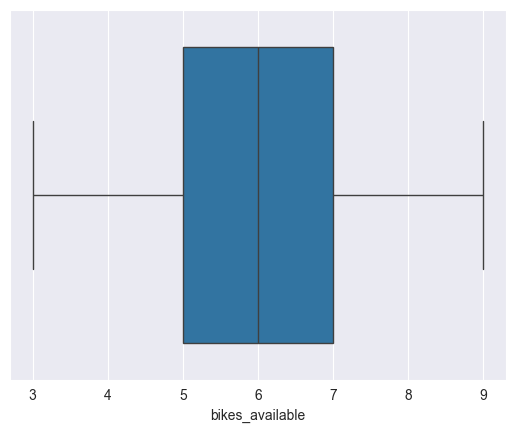

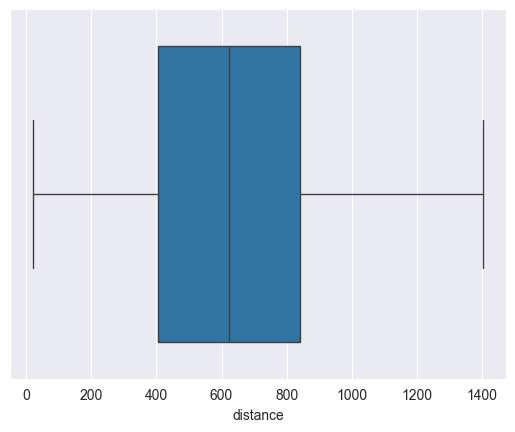

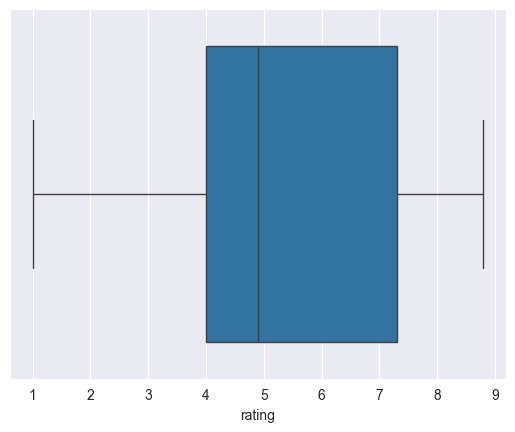

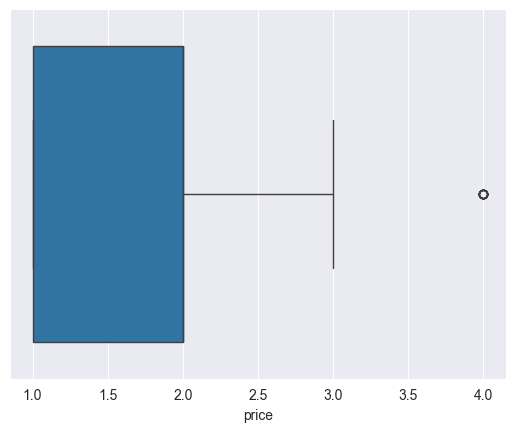

In [117]:
# 8. Detecting Outliers
sns.boxplot(x=df['bikes_available'])
plt.show()
sns.boxplot(x=df['distance'])
plt.show()
sns.boxplot(x=df['rating'])
plt.show()
sns.boxplot(x=df['price'])
plt.show()

In [118]:
# Standard Deviation
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print('IQR:\n', IQR)

IQR:
 price                1.00
rating               3.30
distance           435.25
bikes_available      2.00
dtype: float64


In [119]:
# Remove outliers 
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'DataFrame after dropping outliers {df.shape}')

DataFrame after dropping outliers (244, 4)


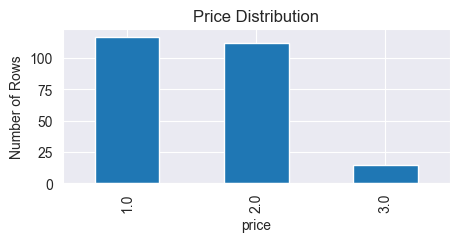

In [120]:
# 9. Plot different features against one another (scatter), 
# against frequency (histogram)
df['price'].value_counts().plot(kind='bar', figsize=(5, 2))
plt.title("Price Distribution")
plt.ylabel('Number of Rows')
plt.xlabel('price');

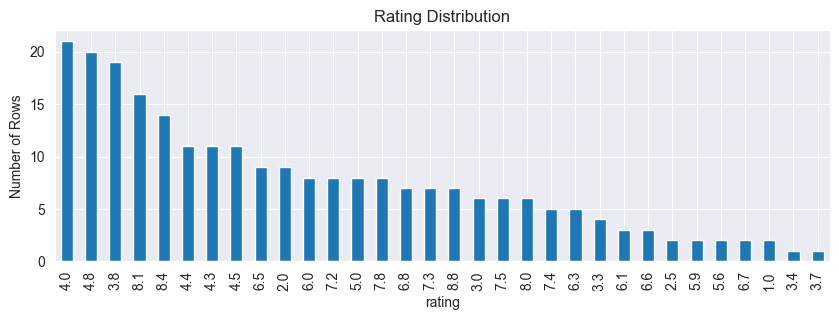

In [121]:
df['rating'].value_counts().plot(kind='bar', figsize=(10, 3))
plt.title("Rating Distribution")
plt.ylabel('Number of Rows')
plt.xlabel('rating');

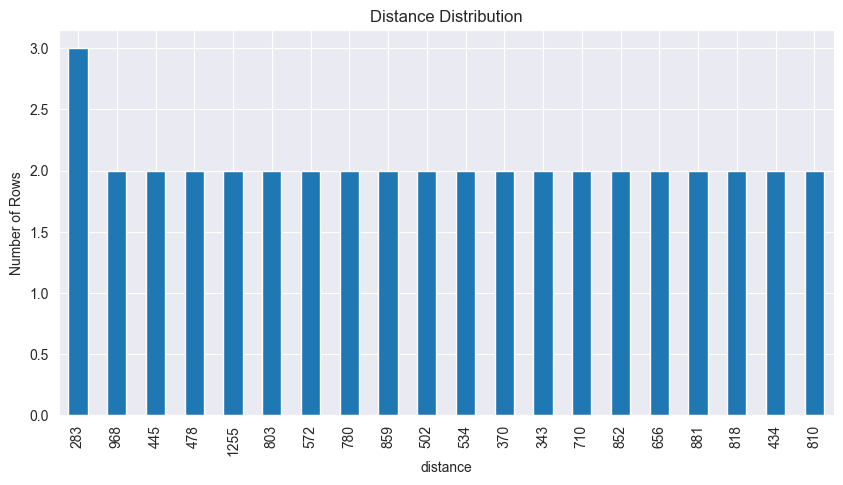

In [122]:
df['distance'].value_counts().nlargest(20).plot(kind='bar', figsize=(10, 5))
plt.title("Distance Distribution")
plt.ylabel('Number of Rows')
plt.xlabel('distance');

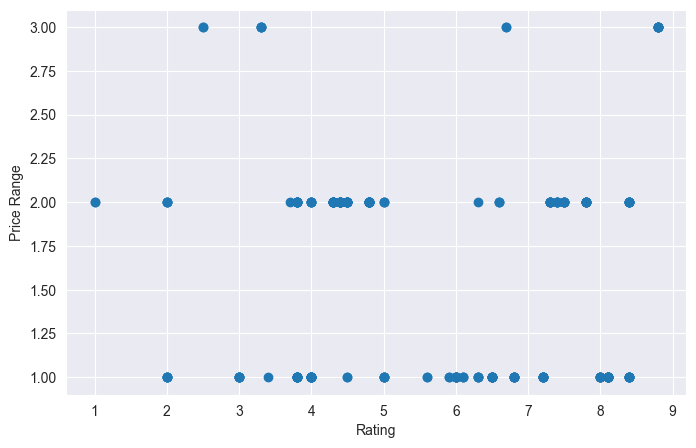

In [123]:
# Scatterplot
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df['rating'], df['price'])
ax.set_xlabel('Rating')
ax.set_ylabel('Price Range')
plt.show()

<Axes: >

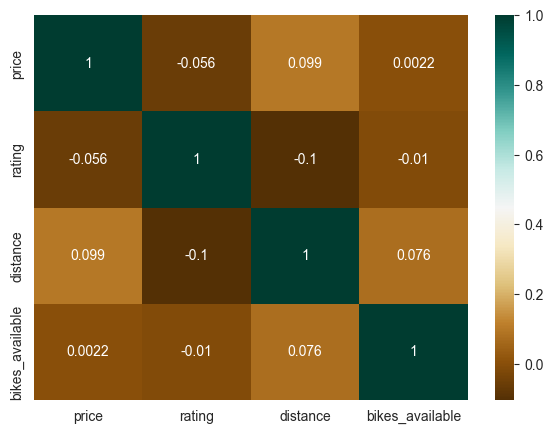

In [124]:
# Heat Maps
plt.figure(figsize=(7, 5))
c = df.corr(numeric_only=True)
sns.heatmap(c, cmap="BrBG", annot=True)

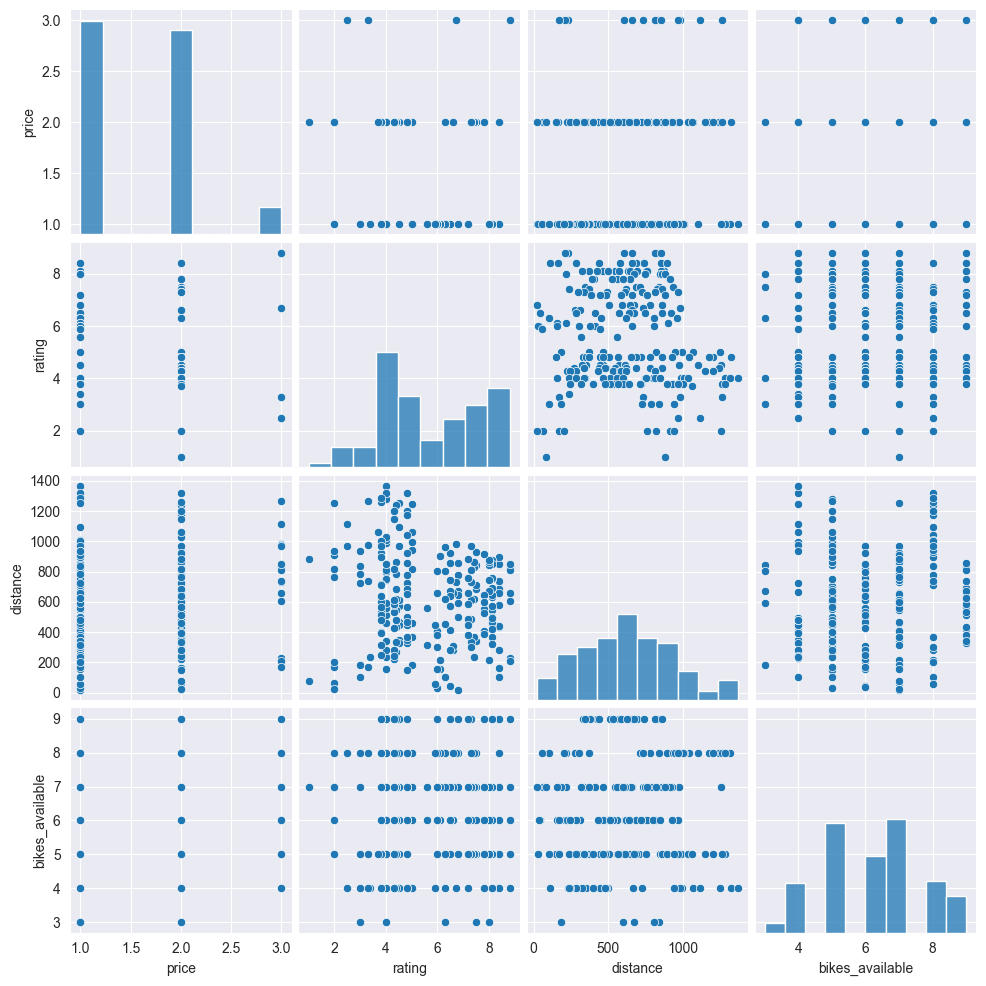

In [125]:
sns.pairplot(data=df)
plt.show()

### Build a regression model.

In [134]:
df[['price', 'rating', 'distance', 'bikes_available']]

,price,rating,distance,bikes_available
0,3.0,8.8,657,5
1,3.0,8.8,603,6
2,3.0,8.8,229,4
3,3.0,8.8,211,6
4,3.0,8.8,832,9
...,...,...,...,...
720,2.0,2.0,761,7
721,1.0,2.0,1255,7
722,2.0,2.0,818,7
725,2.0,1.0,79,7


In [126]:
# Define dependent and independent variables
X = df[['distance', 'rating', 'price']]  # Independent variables
y = df['bikes_available']  # Dependent variable

# Add a constant to the independent variables
X = sm.add_constant(X)

# Build the model
model = sm.OLS(y, X).fit()

# Summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        bikes_available   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4666
Date:                Thu, 21 Nov 2024   Prob (F-statistic):              0.706
Time:                        10:16:54   Log-Likelihood:                -446.24
No. Observations:                 244   AIC:                             900.5
Df Residuals:                     240   BIC:                             914.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9956      0.456     13.152      0.0

#### Insights from the Model
1. R-squared Value:
- 0.006: The model explains 0.6% of the variance in the number of bikes available.
2. Coefficients:
- price (-0.0138): For every unit increase in price, the number of bikes decreases by 0.014, holding other variables constant. This is not statistically significant (p ~ 0.93).
- rating (-0.0020): For every unit increase in POI rating, bikes decrease by 0.002, also not significant (p ~ 0.97).
- distance (0.0004): Distance slightly impacts bike availability, indicating farther locations may have fewer bikes. This is not statistically significant (p ~ 0.24).
3. Constant:
- The baseline number of bikes when all predictors are zero is approximately 5.99.

#### Derived Insights
1. Price as a Predictor:
- Higher prices are not associated with more bikes, but premium locations might attract more bike-sharing services.
2. Distance:
- Locations farther from central POIs tend to have fewer bikes, possibly due to lower demand or accessibility issues.
3. Rating:
- Higher-rated POIs slightly increase bike counts, indicating quality of nearby amenities might influence bike presence.


# Stretch

In [127]:
import scipy

stat, p1 = scipy.stats.pearsonr(df['price'], df['rating'])
stat, p2 = scipy.stats.pearsonr(df['price'], df['distance'])
stat, p3 = scipy.stats.pearsonr(df['rating'], df['distance'])
print(p1, p2, p3)

0.38289068473178806 0.12277254908178974 0.10678940451167128


### How can you turn the regression model into a classification model?

#### To transform the regression problem into a classification problem, we change the nature of the dependent variable. Instead of predicting a continuous value (number of bikes), we classify the locations into discrete categories (e.g., low, medium, or high bike availability).

In [128]:
df['price_range'] = pd.cut(
    df['price'],
    bins=[0, 1, 2, float('inf')],
    labels=['Low', 'Medium', 'High']
)
df

,price,rating,distance,bikes_available,price_range
0,3.0,8.8,657,5,High
1,3.0,8.8,603,6,High
2,3.0,8.8,229,4,High
3,3.0,8.8,211,6,High
4,3.0,8.8,832,9,High
...,...,...,...,...,...
720,2.0,2.0,761,7,Medium
721,1.0,2.0,1255,7,Low
722,2.0,2.0,818,7,Medium
725,2.0,1.0,79,7,Medium


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Features and target
X = df[['price', 'rating', 'distance']]
y = df['price_range'].cat.codes  # Convert categories to numeric codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00         3

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74

